# NLP1011 HW1:

In [113]:
from sklearn import datasets
import pandas as pd
import numpy as np
import spacy
import string
import pickle as pkl

In [326]:
import sklearn
import random
import matplotlib.pyplot as plt

# Load data into DataFrame:

In [137]:
df = sklearn.datasets.load_files('/Users/xiaofanbai/desktop/NLP/aclImdb/train')
df_test = sklearn.datasets.load_files('/Users/xiaofanbai/desktop/NLP/aclImdb/test')

In [138]:
df.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [139]:
df = dict((k, df_train[k]) for k in ['data','target'])
df_test = dict((k, df_test[k]) for k in ['data','target'])
df = pd.DataFrame.from_dict(df_train)
df_test = pd.DataFrame.from_dict(df_test)
df.head()

,data,target
0,"b""Zero Day leads you to think, even re-think w...",1
1,b'Words can\'t describe how bad this movie is....,0
2,b'Everyone plays their part pretty well in thi...,1
3,b'There are a lot of highly talented filmmaker...,0
4,b'I\'ve just had the evidence that confirmed m...,0


In [151]:
#####train valida split
index_vali = random.sample(range(0,25000), 5000)
df_vali = df.iloc[index]
df_vali.reset_index(inplace = True, drop = True)
index_train = [item for item in df.index if item not in index]
df_train = df.iloc[index_train]
df_train.reset_index(inplace = True, drop = True)

In [153]:
df_train.head()

,data,target
0,"b""Zero Day leads you to think, even re-think w...",1
1,b'Words can\'t describe how bad this movie is....,0
2,b'Everyone plays their part pretty well in thi...,1
3,b'There are a lot of highly talented filmmaker...,0
4,b'I\'ve just had the evidence that confirmed m...,0


In [154]:
len(df_train)

20000

# Tokenization schemes of the dataset:

In [83]:
###load English tokenizer
tokenizer = spacy.load('en_core_web_sm')
punctuations = string.punctuation

In [112]:
####lowercase and remove punctuation
def tokenize(review):
    tokens = tokenizer(review)
    return [token.text.lower() for token in tokens if (token.text not in punctuations)]

In [114]:
def tokenize_dataset(dataset):
    token_dataset = []
    all_tokens = []

    for sample in dataset:
        tokens = tokenize(sample)
        token_dataset.append(tokens)
        all_tokens += tokens

    return token_dataset, all_tokens

In [177]:
###to string
df_vali['data'] = df_vali['data'].astype(str)
df_train['data'] = df_train['data'].astype(str)
df_test['data'] = df_test['data'].astype(str)

/Users/xiaofanbai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/xiaofanbai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [179]:
vali_data = np.array(df_vali['data'])
train_data = np.array(df_train['data'])
test_data = np.array(df_test['data'])

In [277]:
vali_target = list(df_vali['target'])
train_target = list(df_train['target'])
test_target = list(df_test['target'])

In [201]:
#vali set tokens
print("Tokenizing vali data")
vali_data_tokens, _ = tokenize_dataset(vali_data)
pkl.dump(vali_data_tokens, open("vali_data_tokens.p", "wb"))

Tokenizing vali data


In [185]:
#test set tokens
print("Tokenizing test data")
test_data_tokens, _ = tokenize_dataset(test_data)
pkl.dump(test_data_tokens, open("test_data_tokens.p", "wb"))

Tokenizing train data
Tokenizing test data


In [191]:
#train set tokens
print("Tokenizing train data")
train_data_tokens, all_train_tokens = tokenize_dataset(train_data)
pkl.dump(train_data_tokens, open("train_data_tokens.p", "wb"))
pkl.dump(all_train_tokens, open("all_data_tokens.p", "wb"))

Tokenizing train data


# Bag of N-grams Implementation:

In [190]:
from nltk import ngrams
import pickle as pkl

In [202]:
####load data
train_tokens = pkl.load(open("train_data_tokens.p", "rb"))
all_tokens = pkl.load(open("all_data_tokens.p", "rb"))
vali_tokens = pkl.load(open("vali_data_tokens.p","rb"))
test_tokens = pkl.load(open("test_data_tokens.p","rb"))

####check data
print ("Train dataset size is {}".format(len(train_tokens)))
print ("Val dataset size is {}".format(len(vali_tokens)))
print ("Test dataset size is {}".format(len(test_tokens)))
print ("Total number of tokens in train dataset is {}".format(len(all_tokens)))

Train dataset size is 20000
Val dataset size is 5000
Test dataset size is 25000
Total number of tokens in train dataset is 4792932


In [356]:
#####n-gram(n = 1,2,3,4), voculbulary size and embedding size
def N_grams_all(data, n):
    container1 = []
    grams = ngrams(data,n)
    for j in grams:
        container1.append(j)
            
    return container1

In [376]:
def N_grams_under(data, n):
    
    container2 = []
    for i in range(0,len(data)):
        container3 = []
        grams = ngrams(data[i],n)
        for j in grams:
            container3.append(j)

        container2.append(container3)

    return container2

In [323]:
########create dictionary and vocabulary size 
from collections import Counter

#max_size = 10000

pad_idx = 0
unk_idx = 1

def vocab(data, max_size):
    
    token_counter = Counter(data)
    vocab, count = zip(*token_counter.most_common(max_size))
    id2token = list(vocab)
    token2id = dict(zip(vocab, range(2,2+len(vocab))))
    id2token = ['<pad>','<unk>'] + id2token
    token2id['<pad>'] = pad_idx
    token2id['<unk>'] = unk_idx
    
    return token2id, id2token


#token2id, id2token = vocab(all_tokens)

In [265]:
####convert token to id for underlying dataset
def token2index(data):
    
    indices_data = []
    for tokens in data:
        index_list = [token2id[token] if token in token2id else unk_idx for token in tokens]
        indices_data.append(index_list)
        
    return indices_data

#train_indices = token2index(train_tokens)
#vali_indices = token2index(vali_tokens)
#test_indices = token2index(test_tokens)

# Bag of words model implementation:

In [284]:
####create dataloader
import torch

MAX_SENTENCE_LENGTH = 200

import numpy as np
import torch
from torch.utils.data import Dataset

class NewsGroupDataset(Dataset):
    
    
    def __init__(self, data_list, target_list):

        self.data_list = data_list
        self.target_list = target_list
        assert (len(self.data_list) == len(self.target_list))

    def __len__(self):
        return len(self.data_list)
        
    def __getitem__(self, key):

        token_idx = self.data_list[key][:MAX_SENTENCE_LENGTH]
        label = self.target_list[key]
        return [token_idx, len(token_idx), label]

def newsgroup_collate_func(batch):

    data_list = []
    label_list = []
    length_list = []

    for datum in batch:
        label_list.append(datum[2])
        length_list.append(datum[1])

    for datum in batch:
        padded_vec = np.pad(np.array(datum[0]), 
                                pad_width=((0,MAX_SENTENCE_LENGTH-datum[1])), 
                                mode="constant", constant_values=0)
        data_list.append(padded_vec)
    return [torch.from_numpy(np.array(data_list)), torch.LongTensor(length_list), torch.LongTensor(label_list)]




In [289]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class BagofWords(nn.Module):
    
    def __init__(self, vocab_size, emb_dim):
        
        super(BagofWords, self).__init__()
        self.embed = nn.Embedding(vocab_size, emb_dim, padding_idx=0) 
        self.linear = nn.Linear(emb_dim,2)
        
    def forward(self, data, length):
        
        out = self.embed(data)
        out = torch.sum(out, dim = 1)
        out /= length.view(length.size()[0],1).expand_as(out).float()
        
        out = self.linear(out.float())
        
        return out
    

In [298]:
#####function to train and get accuracy
#####optimizer Adam
def get_accuracy(learning_rate, train_loader, vali_loader):
    

        num_epochs = 8 # number epoch to train


        criterion = torch.nn.CrossEntropyLoss()  
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


        def test_model(loader, model):

            correct = 0
            total = 0
            model.eval()
            for data, lengths, labels in loader:
                data_batch, length_batch, label_batch = data, lengths, labels
                outputs = F.softmax(model(data_batch, length_batch), dim=1)
                predicted = outputs.max(1, keepdim=True)[1]

                total += labels.size(0)
                correct += predicted.eq(labels.view_as(predicted)).sum().item()
            return (100 * correct / total)

        accuracy = []

        for epoch in range(num_epochs):

            for i, (data, lengths, labels) in enumerate(train_loader):
                model.train()
                data_batch, length_batch, label_batch = data, lengths, labels
                optimizer.zero_grad()
                outputs = model(data_batch, length_batch)
                loss = criterion(outputs, label_batch)
                loss.backward()
                optimizer.step()

                if i > 0 and i % 100 == 0:
                    val_acc = test_model(vali_loader, model)

                    print('Epoch: [{}/{}], Step: [{}/{}], Validation Acc: {}'.format( 
                               epoch+1, num_epochs, i+1, len(train_loader), val_acc))
                    accuracy.append(val_acc)

        accuracy = max(accuracy)
        
        return accuracy

In [339]:
#####function to train and get accuracy
#####optimizer SGD
def get_accuracy_sgd(learning_rate, train_loader, vali_loader):
    

        num_epochs = 8 # number epoch to train


        criterion = torch.nn.CrossEntropyLoss()  
        optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


        def test_model(loader, model):

            correct = 0
            total = 0
            model.eval()
            for data, lengths, labels in loader:
                data_batch, length_batch, label_batch = data, lengths, labels
                outputs = F.softmax(model(data_batch, length_batch), dim=1)
                predicted = outputs.max(1, keepdim=True)[1]

                total += labels.size(0)
                correct += predicted.eq(labels.view_as(predicted)).sum().item()
            return (100 * correct / total)

        accuracy = []

        for epoch in range(num_epochs):

            for i, (data, lengths, labels) in enumerate(train_loader):
                model.train()
                data_batch, length_batch, label_batch = data, lengths, labels
                optimizer.zero_grad()
                outputs = model(data_batch, length_batch)
                loss = criterion(outputs, label_batch)
                loss.backward()
                optimizer.step()

                if i > 0 and i % 100 == 0:
                    val_acc = test_model(vali_loader, model)

                    print('Epoch: [{}/{}], Step: [{}/{}], Validation Acc: {}'.format( 
                               epoch+1, num_epochs, i+1, len(train_loader), val_acc))
                    accuracy.append(val_acc)

        accuracy = max(accuracy)
        
        return accuracy

In [415]:
#####function to train and get accuracy
#####optimizer Adam
#####torch.optim.lr_scheduler.CosineAnnealingLR(optimizer)
def get_accuracy_changing_lr(learning_rate, train_loader, vali_loader):
    

        num_epochs = 8 # number epoch to train


        criterion = torch.nn.CrossEntropyLoss()  
        #optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
        #scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.1)

        def test_model(loader, model):

            correct = 0
            total = 0
            model.eval()
            loss = 0
            for data, lengths, labels in loader:
                data_batch, length_batch, label_batch = data, lengths, labels
                outputs = F.softmax(model(data_batch, length_batch), dim=1)

                predicted = outputs.max(1, keepdim=True)[1]

                total += labels.size(0)
                correct += predicted.eq(labels.view_as(predicted)).sum().item()
                
            return (100 * correct / total)

        accuracy = []

        for epoch in range(num_epochs):
            
            optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
            
            
            for i, (data, lengths, labels) in enumerate(train_loader):
                model.train()
                data_batch, length_batch, label_batch = data, lengths, labels
                optimizer.zero_grad()
                outputs = model(data_batch, length_batch)
                loss = criterion(outputs, label_batch)
                loss.backward()
                optimizer.step()

                if i > 0 and i % 100 == 0:
                    
                    val_acc = test_model(vali_loader, model)
  
                    print('Epoch: [{}/{}], Step: [{}/{}], Validation Acc: {}'.format( 
                               epoch+1, num_epochs, i+1, len(train_loader), val_acc))
                    accuracy.append(val_acc)
        
            learning_rate -= 0.001  
            
        accuracy = max(accuracy)
                    
        
        return accuracy

# Changing N-grams:

In [381]:
####compare hyperparameters:
####Model Hyperparameters:
####N-grams
accuracy = []
for n in [1,2,3,4]:
    
    data = N_grams(all_tokens, n)
    train_tokens_new = N_grams_under(train_tokens,n)
    vali_tokens_new = N_grams_under(vali_tokens,n)
    test_tokens_new = N_grams_under(test_tokens,n)
    
    token2id, id2token = vocab(data, 10000)
    train_indices = token2index(train_tokens_new)
    vali_indices = token2index(vali_tokens_new)
    test_indices = token2index(test_tokens_new)
    
    ####data loader
    train_dataset = NewsGroupDataset(train_indices, train_target)
    train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                               batch_size=BATCH_SIZE,
                                               collate_fn=newsgroup_collate_func,
                                               shuffle=True)

    vali_dataset = NewsGroupDataset(vali_indices, vali_target)
    vali_loader = torch.utils.data.DataLoader(dataset=vali_dataset, 
                                               batch_size=BATCH_SIZE,
                                               collate_fn=newsgroup_collate_func,
                                               shuffle=True)

    test_dataset = NewsGroupDataset(test_indices, test_target)
    test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                               batch_size=BATCH_SIZE,
                                               collate_fn=newsgroup_collate_func,
                                               shuffle=False)

    ####build model
    emb_dim = 100
    model = BagofWords(len(id2token),emb_dim)
    
    ####get accuracy
    accuracy.append(get_accuracy(0.01, train_loader, vali_loader))





Epoch: [1/8], Step: [101/625], Validation Acc: 78.32
Epoch: [1/8], Step: [201/625], Validation Acc: 84.46
Epoch: [1/8], Step: [301/625], Validation Acc: 84.78
Epoch: [1/8], Step: [401/625], Validation Acc: 85.9
Epoch: [1/8], Step: [501/625], Validation Acc: 86.38
Epoch: [1/8], Step: [601/625], Validation Acc: 86.78
Epoch: [2/8], Step: [101/625], Validation Acc: 87.0
Epoch: [2/8], Step: [201/625], Validation Acc: 87.08
Epoch: [2/8], Step: [301/625], Validation Acc: 86.02
Epoch: [2/8], Step: [401/625], Validation Acc: 86.6
Epoch: [2/8], Step: [501/625], Validation Acc: 86.84
Epoch: [2/8], Step: [601/625], Validation Acc: 87.0
Epoch: [3/8], Step: [101/625], Validation Acc: 86.84
Epoch: [3/8], Step: [201/625], Validation Acc: 86.64
Epoch: [3/8], Step: [301/625], Validation Acc: 86.24
Epoch: [3/8], Step: [401/625], Validation Acc: 86.38
Epoch: [3/8], Step: [501/625], Validation Acc: 86.12
Epoch: [3/8], Step: [601/625], Validation Acc: 86.2
Epoch: [4/8], Step: [101/625], Validation Acc: 86.0

Epoch: [3/8], Step: [101/625], Validation Acc: 72.14
Epoch: [3/8], Step: [201/625], Validation Acc: 70.08
Epoch: [3/8], Step: [301/625], Validation Acc: 71.58
Epoch: [3/8], Step: [401/625], Validation Acc: 69.58
Epoch: [3/8], Step: [501/625], Validation Acc: 71.78
Epoch: [3/8], Step: [601/625], Validation Acc: 71.66
Epoch: [4/8], Step: [101/625], Validation Acc: 70.44
Epoch: [4/8], Step: [201/625], Validation Acc: 70.7
Epoch: [4/8], Step: [301/625], Validation Acc: 71.68
Epoch: [4/8], Step: [401/625], Validation Acc: 71.42
Epoch: [4/8], Step: [501/625], Validation Acc: 70.32
Epoch: [4/8], Step: [601/625], Validation Acc: 70.54
Epoch: [5/8], Step: [101/625], Validation Acc: 71.26
Epoch: [5/8], Step: [201/625], Validation Acc: 71.62
Epoch: [5/8], Step: [301/625], Validation Acc: 69.36
Epoch: [5/8], Step: [401/625], Validation Acc: 68.44
Epoch: [5/8], Step: [501/625], Validation Acc: 71.52
Epoch: [5/8], Step: [601/625], Validation Acc: 70.4
Epoch: [6/8], Step: [101/625], Validation Acc: 7

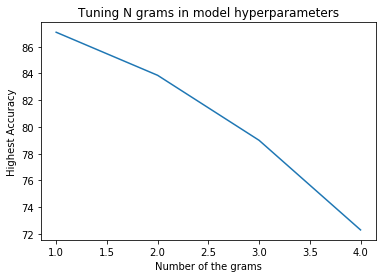

In [382]:
####tuning N-grams in model hyperparameters
N_for_ngrams = [1,2,3,4]
plt.plot(N_for_ngrams, accuracy)
plt.title("Tuning N grams in model hyperparameters")
plt.xlabel("Number of the grams")
plt.ylabel("Highest Accuracy")
plt.show()

# Tuning vocabulary size:

In [428]:
####tuning vocabulary size
accuracy_vob = []

for size in [10000,15000,20000, 25000]:

    token2id, id2token = vocab(all_tokens, size)
    train_indices = token2index(train_tokens)
    vali_indices = token2index(vali_tokens)
    test_indices = token2index(test_tokens)

    ####data loader
    train_dataset = NewsGroupDataset(train_indices, train_target)
    train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                               batch_size=BATCH_SIZE,
                                               collate_fn=newsgroup_collate_func,
                                               shuffle=True)

    vali_dataset = NewsGroupDataset(vali_indices, vali_target)
    vali_loader = torch.utils.data.DataLoader(dataset=vali_dataset, 
                                               batch_size=BATCH_SIZE,
                                               collate_fn=newsgroup_collate_func,
                                               shuffle=True)

    test_dataset = NewsGroupDataset(test_indices, test_target)
    test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                               batch_size=BATCH_SIZE,
                                               collate_fn=newsgroup_collate_func,
                                               shuffle=False)

    ####build model
    emb_dim = 100
    model = BagofWords(len(id2token),emb_dim)

    ####get accuracy
    accuracy_vob.append(get_accuracy(0.02, train_loader, vali_loader))





Epoch: [1/8], Step: [101/625], Validation Acc: 77.78
Epoch: [1/8], Step: [201/625], Validation Acc: 85.08
Epoch: [1/8], Step: [301/625], Validation Acc: 85.84
Epoch: [1/8], Step: [401/625], Validation Acc: 86.44
Epoch: [1/8], Step: [501/625], Validation Acc: 85.88
Epoch: [1/8], Step: [601/625], Validation Acc: 87.02
Epoch: [2/8], Step: [101/625], Validation Acc: 85.74
Epoch: [2/8], Step: [201/625], Validation Acc: 86.48
Epoch: [2/8], Step: [301/625], Validation Acc: 86.2
Epoch: [2/8], Step: [401/625], Validation Acc: 86.1
Epoch: [2/8], Step: [501/625], Validation Acc: 86.42
Epoch: [2/8], Step: [601/625], Validation Acc: 86.46
Epoch: [3/8], Step: [101/625], Validation Acc: 86.42
Epoch: [3/8], Step: [201/625], Validation Acc: 85.42
Epoch: [3/8], Step: [301/625], Validation Acc: 86.12
Epoch: [3/8], Step: [401/625], Validation Acc: 85.96
Epoch: [3/8], Step: [501/625], Validation Acc: 86.06
Epoch: [3/8], Step: [601/625], Validation Acc: 85.92
Epoch: [4/8], Step: [101/625], Validation Acc: 8

Epoch: [3/8], Step: [101/625], Validation Acc: 86.88
Epoch: [3/8], Step: [201/625], Validation Acc: 86.46
Epoch: [3/8], Step: [301/625], Validation Acc: 86.24
Epoch: [3/8], Step: [401/625], Validation Acc: 86.04
Epoch: [3/8], Step: [501/625], Validation Acc: 86.06
Epoch: [3/8], Step: [601/625], Validation Acc: 83.68
Epoch: [4/8], Step: [101/625], Validation Acc: 85.82
Epoch: [4/8], Step: [201/625], Validation Acc: 86.26
Epoch: [4/8], Step: [301/625], Validation Acc: 85.98
Epoch: [4/8], Step: [401/625], Validation Acc: 85.56
Epoch: [4/8], Step: [501/625], Validation Acc: 85.7
Epoch: [4/8], Step: [601/625], Validation Acc: 85.52
Epoch: [5/8], Step: [101/625], Validation Acc: 85.28
Epoch: [5/8], Step: [201/625], Validation Acc: 85.32
Epoch: [5/8], Step: [301/625], Validation Acc: 85.56
Epoch: [5/8], Step: [401/625], Validation Acc: 85.22
Epoch: [5/8], Step: [501/625], Validation Acc: 85.76
Epoch: [5/8], Step: [601/625], Validation Acc: 84.62
Epoch: [6/8], Step: [101/625], Validation Acc: 

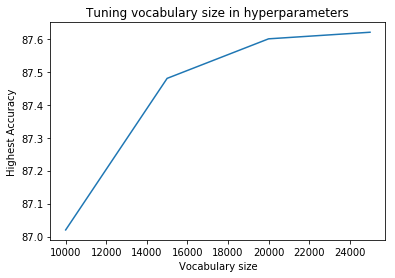

In [429]:
####tuning vocabulary size
size = [10000,15000,20000, 25000]
plt.plot(size, accuracy_vob)
plt.title("Tuning vocabulary size in hyperparameters")
plt.xlabel("Vocabulary size")
plt.ylabel("Highest Accuracy")
plt.show()

# Tuning embedding size:

In [333]:
accuracy_emb = []

for emb_dim in [20, 40, 80, 100, 150]:

    token2id, id2token = vocab(all_tokens, 10000)
    train_indices = token2index(train_tokens)
    vali_indices = token2index(vali_tokens)
    test_indices = token2index(test_tokens)

    ####data loader
    train_dataset = NewsGroupDataset(train_indices, train_target)
    train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                               batch_size=BATCH_SIZE,
                                               collate_fn=newsgroup_collate_func,
                                               shuffle=True)

    vali_dataset = NewsGroupDataset(vali_indices, vali_target)
    vali_loader = torch.utils.data.DataLoader(dataset=vali_dataset, 
                                               batch_size=BATCH_SIZE,
                                               collate_fn=newsgroup_collate_func,
                                               shuffle=True)

    test_dataset = NewsGroupDataset(test_indices, test_target)
    test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                               batch_size=BATCH_SIZE,
                                               collate_fn=newsgroup_collate_func,
                                               shuffle=False)

    ####build model

    model = BagofWords(len(id2token),emb_dim)

    ####get accuracy
    accuracy_emb.append(get_accuracy(0.02, train_loader, vali_loader))


Epoch: [1/8], Step: [101/625], Validation Acc: 76.42
Epoch: [1/8], Step: [201/625], Validation Acc: 84.16
Epoch: [1/8], Step: [301/625], Validation Acc: 86.0
Epoch: [1/8], Step: [401/625], Validation Acc: 86.28
Epoch: [1/8], Step: [501/625], Validation Acc: 86.56
Epoch: [1/8], Step: [601/625], Validation Acc: 87.28
Epoch: [2/8], Step: [101/625], Validation Acc: 86.7
Epoch: [2/8], Step: [201/625], Validation Acc: 87.04
Epoch: [2/8], Step: [301/625], Validation Acc: 86.82
Epoch: [2/8], Step: [401/625], Validation Acc: 86.7
Epoch: [2/8], Step: [501/625], Validation Acc: 86.64
Epoch: [2/8], Step: [601/625], Validation Acc: 86.6
Epoch: [3/8], Step: [101/625], Validation Acc: 86.42
Epoch: [3/8], Step: [201/625], Validation Acc: 86.18
Epoch: [3/8], Step: [301/625], Validation Acc: 85.92
Epoch: [3/8], Step: [401/625], Validation Acc: 86.08
Epoch: [3/8], Step: [501/625], Validation Acc: 85.78
Epoch: [3/8], Step: [601/625], Validation Acc: 86.1
Epoch: [4/8], Step: [101/625], Validation Acc: 86.4

Epoch: [3/8], Step: [101/625], Validation Acc: 85.8
Epoch: [3/8], Step: [201/625], Validation Acc: 85.7
Epoch: [3/8], Step: [301/625], Validation Acc: 85.76
Epoch: [3/8], Step: [401/625], Validation Acc: 85.74
Epoch: [3/8], Step: [501/625], Validation Acc: 85.76
Epoch: [3/8], Step: [601/625], Validation Acc: 86.32
Epoch: [4/8], Step: [101/625], Validation Acc: 85.34
Epoch: [4/8], Step: [201/625], Validation Acc: 85.56
Epoch: [4/8], Step: [301/625], Validation Acc: 85.78
Epoch: [4/8], Step: [401/625], Validation Acc: 85.92
Epoch: [4/8], Step: [501/625], Validation Acc: 85.7
Epoch: [4/8], Step: [601/625], Validation Acc: 85.62
Epoch: [5/8], Step: [101/625], Validation Acc: 85.36
Epoch: [5/8], Step: [201/625], Validation Acc: 85.12
Epoch: [5/8], Step: [301/625], Validation Acc: 85.14
Epoch: [5/8], Step: [401/625], Validation Acc: 85.38
Epoch: [5/8], Step: [501/625], Validation Acc: 84.68
Epoch: [5/8], Step: [601/625], Validation Acc: 84.86
Epoch: [6/8], Step: [101/625], Validation Acc: 84

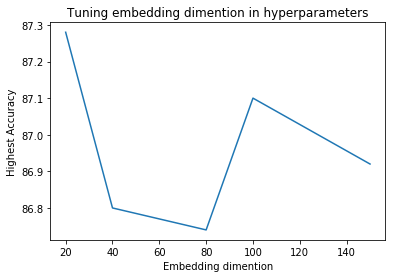

In [336]:
####tuning embedding dimention
dim = [20, 40, 80, 100, 150]
plt.plot(dim, accuracy_emb)
plt.title("Tuning embedding dimention in hyperparameters")
plt.xlabel("Embedding dimention")
plt.ylabel("Highest Accuracy")
plt.show() 

# Tuning optimizer Adam vs. SGD:


In [337]:
#####Tuning optimization hyperparameters
accuracy_opt = []

token2id, id2token = vocab(all_tokens, 10000)
train_indices = token2index(train_tokens)
vali_indices = token2index(vali_tokens)
test_indices = token2index(test_tokens)

####data loader
train_dataset = NewsGroupDataset(train_indices, train_target)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=True)

vali_dataset = NewsGroupDataset(vali_indices, vali_target)
vali_loader = torch.utils.data.DataLoader(dataset=vali_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=True)

test_dataset = NewsGroupDataset(test_indices, test_target)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=False)

####ADM optimizer
####build model
emb_dim = 100
model = BagofWords(len(id2token),emb_dim)

####get accuracy
accuracy_opt.append(get_accuracy(0.02, train_loader, vali_loader))


Epoch: [1/8], Step: [101/625], Validation Acc: 82.92
Epoch: [1/8], Step: [201/625], Validation Acc: 84.42
Epoch: [1/8], Step: [301/625], Validation Acc: 85.96
Epoch: [1/8], Step: [401/625], Validation Acc: 86.0
Epoch: [1/8], Step: [501/625], Validation Acc: 86.16
Epoch: [1/8], Step: [601/625], Validation Acc: 86.46
Epoch: [2/8], Step: [101/625], Validation Acc: 85.88
Epoch: [2/8], Step: [201/625], Validation Acc: 86.02
Epoch: [2/8], Step: [301/625], Validation Acc: 85.66
Epoch: [2/8], Step: [401/625], Validation Acc: 85.88
Epoch: [2/8], Step: [501/625], Validation Acc: 85.14
Epoch: [2/8], Step: [601/625], Validation Acc: 86.18
Epoch: [3/8], Step: [101/625], Validation Acc: 86.1
Epoch: [3/8], Step: [201/625], Validation Acc: 85.74
Epoch: [3/8], Step: [301/625], Validation Acc: 85.76
Epoch: [3/8], Step: [401/625], Validation Acc: 86.16
Epoch: [3/8], Step: [501/625], Validation Acc: 86.04
Epoch: [3/8], Step: [601/625], Validation Acc: 86.28
Epoch: [4/8], Step: [101/625], Validation Acc: 8

In [340]:
####SGD optimizer
accuracy_opt.append(get_accuracy_sgd(0.02, train_loader, vali_loader))

Epoch: [1/8], Step: [101/625], Validation Acc: 83.84
Epoch: [1/8], Step: [201/625], Validation Acc: 83.86
Epoch: [1/8], Step: [301/625], Validation Acc: 83.78
Epoch: [1/8], Step: [401/625], Validation Acc: 83.74
Epoch: [1/8], Step: [501/625], Validation Acc: 83.78
Epoch: [1/8], Step: [601/625], Validation Acc: 83.78
Epoch: [2/8], Step: [101/625], Validation Acc: 83.8
Epoch: [2/8], Step: [201/625], Validation Acc: 83.8
Epoch: [2/8], Step: [301/625], Validation Acc: 83.76
Epoch: [2/8], Step: [401/625], Validation Acc: 83.8
Epoch: [2/8], Step: [501/625], Validation Acc: 83.78
Epoch: [2/8], Step: [601/625], Validation Acc: 83.82
Epoch: [3/8], Step: [101/625], Validation Acc: 83.78
Epoch: [3/8], Step: [201/625], Validation Acc: 83.84
Epoch: [3/8], Step: [301/625], Validation Acc: 83.8
Epoch: [3/8], Step: [401/625], Validation Acc: 83.8
Epoch: [3/8], Step: [501/625], Validation Acc: 83.8
Epoch: [3/8], Step: [601/625], Validation Acc: 83.8
Epoch: [4/8], Step: [101/625], Validation Acc: 83.8
E

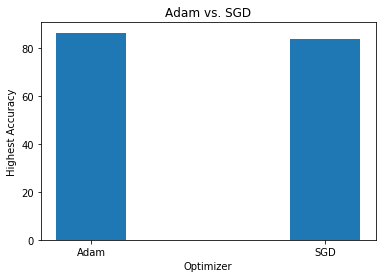

In [348]:
####different optimizer
opt = ["Adam","SGD"]
plt.bar(opt, accuracy_opt,width = 0.3)
plt.title("Adam vs. SGD")
plt.xlabel("Optimizer")
plt.ylabel("Highest Accuracy")
plt.show()

# Tuning Learning Rate:

In [383]:
#####Tuning learning rate
accuracy_lr = []

for lr in [0.01,0.05,0.1,0.2]:

    token2id, id2token = vocab(all_tokens, 10000)
    train_indices = token2index(train_tokens)
    vali_indices = token2index(vali_tokens)
    test_indices = token2index(test_tokens)

    ####data loader
    train_dataset = NewsGroupDataset(train_indices, train_target)
    train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                               batch_size=BATCH_SIZE,
                                               collate_fn=newsgroup_collate_func,
                                               shuffle=True)

    vali_dataset = NewsGroupDataset(vali_indices, vali_target)
    vali_loader = torch.utils.data.DataLoader(dataset=vali_dataset, 
                                               batch_size=BATCH_SIZE,
                                               collate_fn=newsgroup_collate_func,
                                               shuffle=True)

    test_dataset = NewsGroupDataset(test_indices, test_target)
    test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                               batch_size=BATCH_SIZE,
                                               collate_fn=newsgroup_collate_func,
                                               shuffle=False)

    ####build model
    emb_dim = 100
    model = BagofWords(len(id2token),emb_dim)

    ####get accuracy
    accuracy_lr.append(get_accuracy(lr, train_loader, vali_loader))





Epoch: [1/8], Step: [101/625], Validation Acc: 80.66
Epoch: [1/8], Step: [201/625], Validation Acc: 84.76
Epoch: [1/8], Step: [301/625], Validation Acc: 85.78
Epoch: [1/8], Step: [401/625], Validation Acc: 86.3
Epoch: [1/8], Step: [501/625], Validation Acc: 86.34
Epoch: [1/8], Step: [601/625], Validation Acc: 86.28
Epoch: [2/8], Step: [101/625], Validation Acc: 87.26
Epoch: [2/8], Step: [201/625], Validation Acc: 86.86
Epoch: [2/8], Step: [301/625], Validation Acc: 86.76
Epoch: [2/8], Step: [401/625], Validation Acc: 86.76
Epoch: [2/8], Step: [501/625], Validation Acc: 86.1
Epoch: [2/8], Step: [601/625], Validation Acc: 86.5
Epoch: [3/8], Step: [101/625], Validation Acc: 86.88
Epoch: [3/8], Step: [201/625], Validation Acc: 86.68
Epoch: [3/8], Step: [301/625], Validation Acc: 86.78
Epoch: [3/8], Step: [401/625], Validation Acc: 86.28
Epoch: [3/8], Step: [501/625], Validation Acc: 85.74
Epoch: [3/8], Step: [601/625], Validation Acc: 86.2
Epoch: [4/8], Step: [101/625], Validation Acc: 86.

Epoch: [3/8], Step: [101/625], Validation Acc: 84.62
Epoch: [3/8], Step: [201/625], Validation Acc: 84.4
Epoch: [3/8], Step: [301/625], Validation Acc: 83.36
Epoch: [3/8], Step: [401/625], Validation Acc: 78.52
Epoch: [3/8], Step: [501/625], Validation Acc: 84.02
Epoch: [3/8], Step: [601/625], Validation Acc: 80.96
Epoch: [4/8], Step: [101/625], Validation Acc: 84.96
Epoch: [4/8], Step: [201/625], Validation Acc: 84.64
Epoch: [4/8], Step: [301/625], Validation Acc: 83.54
Epoch: [4/8], Step: [401/625], Validation Acc: 82.8
Epoch: [4/8], Step: [501/625], Validation Acc: 82.42
Epoch: [4/8], Step: [601/625], Validation Acc: 83.52
Epoch: [5/8], Step: [101/625], Validation Acc: 83.46
Epoch: [5/8], Step: [201/625], Validation Acc: 84.7
Epoch: [5/8], Step: [301/625], Validation Acc: 84.1
Epoch: [5/8], Step: [401/625], Validation Acc: 83.64
Epoch: [5/8], Step: [501/625], Validation Acc: 83.36
Epoch: [5/8], Step: [601/625], Validation Acc: 84.06
Epoch: [6/8], Step: [101/625], Validation Acc: 84.

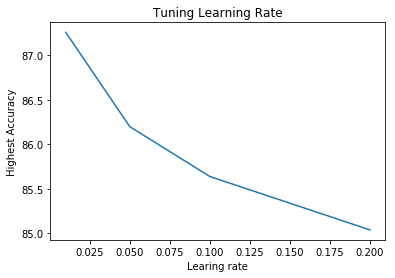

In [384]:
####different learning rate
lr_new = [0.01,0.05,0.1,0.2]
plt.plot(lr_new, accuracy_lr)
plt.title("Tuning Learning Rate")
plt.xlabel("Learing rate")
plt.ylabel("Highest Accuracy")
plt.show()

# Tuning changing learning rate:

In [ ]:
# linnear learning rate
#####Tuning optimization hyperparameters
accuracy_lr_change = []

for lr in [0.01,0.05,0.1,0.2]:
    
        token2id, id2token = vocab(all_tokens, 10000)
        train_indices = token2index(train_tokens)
        vali_indices = token2index(vali_tokens)
        test_indices = token2index(test_tokens)

        ####data loader
        train_dataset = NewsGroupDataset(train_indices, train_target)
        train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                                   batch_size=BATCH_SIZE,
                                                   collate_fn=newsgroup_collate_func,
                                                   shuffle=True)

        vali_dataset = NewsGroupDataset(vali_indices, vali_target)
        vali_loader = torch.utils.data.DataLoader(dataset=vali_dataset, 
                                                   batch_size=BATCH_SIZE,
                                                   collate_fn=newsgroup_collate_func,
                                                   shuffle=True)

        test_dataset = NewsGroupDataset(test_indices, test_target)
        test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                                   batch_size=BATCH_SIZE,
                                                   collate_fn=newsgroup_collate_func,
                                                   shuffle=False)

        ####ADM optimizer
        ####build model
        emb_dim = 100
        model = BagofWords(len(id2token),emb_dim)

        ####get accuracy
        accuracy_lr_change.append(get_accuracy_changing_lr(lr, train_loader, vali_loader))

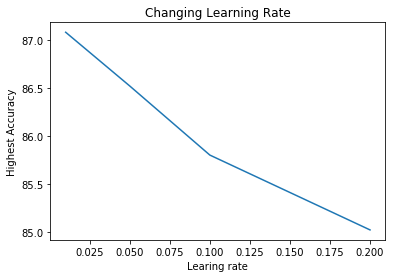

In [422]:
####changing learning rate on epoch
epoch_lr = [0.01,0.05,0.1,0.2]
plt.plot(epoch_lr, accuracy_lr_change)
plt.title("Changing Learning Rate")
plt.xlabel("Learing rate")
plt.ylabel("Highest Accuracy")
plt.show()

# Predict test and get 3 wrong examples:


In [430]:
token2id, id2token = vocab(all_tokens, 15000)
train_indices = token2index(train_tokens)
vali_indices = token2index(vali_tokens)
test_indices = token2index(test_tokens)

####data loader
train_dataset = NewsGroupDataset(train_indices, train_target)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=True)

vali_dataset = NewsGroupDataset(vali_indices, vali_target)
vali_loader = torch.utils.data.DataLoader(dataset=vali_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=True)

test_dataset = NewsGroupDataset(test_indices, test_target)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=False)

####ADM optimizer
####build model
emb_dim = 100
model = BagofWords(len(id2token),emb_dim)



In [436]:
num_epochs = 8 # number epoch to train


criterion = torch.nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


def test_model(loader, model):

    correct = 0
    total = 0
    model.eval()
    pred = []
    
    for data, lengths, labels in loader:
        data_batch, length_batch, label_batch = data, lengths, labels
        outputs = F.softmax(model(data_batch, length_batch), dim=1)
        predicted = outputs.max(1, keepdim=True)[1]

        total += labels.size(0)
        correct += predicted.eq(labels.view_as(predicted)).sum().item()
        pred.append(predicted)
        
    return (pred,100*correct/total)



for epoch in range(num_epochs):

    for i, (data, lengths, labels) in enumerate(train_loader):
        model.train()
        data_batch, length_batch, label_batch = data, lengths, labels
        optimizer.zero_grad()
        outputs = model(data_batch, length_batch)
        loss = criterion(outputs, label_batch)
        loss.backward()
        optimizer.step()

        if i > 0 and i % 100 == 0:
            #val_acc = test_model(vali_loader, model)
            test_acc = test_model(test_loader, model)
            print('Epoch: [{}/{}], Step: [{}/{}],Test Acc: {}'.format( 
                       epoch+1, num_epochs, i+1, len(train_loader), test_acc))






Epoch: [1/8], Step: [101/625], Validation Acc: 80.7,Test Acc: 79.244
Epoch: [1/8], Step: [201/625], Validation Acc: 84.84,Test Acc: 83.552
Epoch: [1/8], Step: [301/625], Validation Acc: 85.26,Test Acc: 84.348
Epoch: [1/8], Step: [401/625], Validation Acc: 85.92,Test Acc: 85.16
Epoch: [1/8], Step: [501/625], Validation Acc: 86.24,Test Acc: 85.124
Epoch: [1/8], Step: [601/625], Validation Acc: 86.52,Test Acc: 85.544
Epoch: [2/8], Step: [101/625], Validation Acc: 87.06,Test Acc: 84.84
Epoch: [2/8], Step: [201/625], Validation Acc: 86.54,Test Acc: 84.772
Epoch: [2/8], Step: [301/625], Validation Acc: 86.46,Test Acc: 83.792
Epoch: [2/8], Step: [401/625], Validation Acc: 87.06,Test Acc: 84.436
Epoch: [2/8], Step: [501/625], Validation Acc: 86.28,Test Acc: 83.656
Epoch: [2/8], Step: [601/625], Validation Acc: 86.96,Test Acc: 84.168
Epoch: [3/8], Step: [101/625], Validation Acc: 86.82,Test Acc: 83.984
Epoch: [3/8], Step: [201/625], Validation Acc: 85.86,Test Acc: 82.504
Epoch: [3/8], Step: [30

In [483]:
correct = 0
total = 0
model.eval()
pred_label = []
true_label = []

for data, lengths, labels in test_loader:
    data_batch, length_batch, label_batch = data, lengths, labels
    outputs = F.softmax(model(data_batch, length_batch), dim=1)
    
    predicted = outputs.max(1, keepdim=True)[1]
    #print(predicted)
    #total += labels.size(0)
    #correct += predicted.eq(labels.view_as(predicted)).sum().item()
    #print(predicted.view_as(labels))
    true_label.append(labels.view_as(predicted))
    pred_label.append(predicted)


In [484]:
true_label[0]

tensor([[1],
        [0],
        [1],
        [0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [1],
        [1]])

In [488]:
pred_label[0]

tensor([[0],
        [0],
        [1],
        [0],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [1],
        [1]])

So we can compare the fist batch between these two lists, 1st, 2nd, 7th are predicted wrong, the 3rd, 4st, 5th are predicted correct, let's print it out!

In [501]:
print("Incorrectly predicted:\t  1.\t{},2.\t{},3.\t{}".format(df_test['data'][0], df_test['data'][1],df_test['data'][6]))

Incorrectly predicted:	  1.	b"Don't hate Heather Graham because she's beautiful, hate her because she's fun to watch in this movie. Like the hip clothing and funky surroundings, the actors in this flick work well together. Casey Affleck is hysterical and Heather Graham literally lights up the screen. The minor characters - Goran Visnjic {sigh} and Patricia Velazquez are as TALENTED as they are gorgeous. Congratulations Miramax & Director Lisa Krueger!",2.	b'I don\'t know how this movie has received so many positive comments. One can call it "artistic" and "beautifully filmed", but those things don\'t make up for the empty plot that was filled with sexual innuendos. I wish I had not wasted my time to watch this movie. Rather than being biographical, it was a poor excuse for promoting strange and lewd behavior. It was just another Hollywood attempt to convince us that that kind of life is normal and OK. From the very beginning I asked my self what was the point of this movie,and I contin

In [500]:
print("Correctly predicted:\t  1.\t{},2.\t{},3.\t{}".format(df_test['data'][2], df_test['data'][3],df_test['data'][4]))

Correctly predicted:	  1.	b"I caught this movie on the Horror Channel and was quite impressed by the film's Gothic atmosphere and tone. As a big fan of all things vampire related, I am always happy to see a new variation of the vampire mythos, in this case, a ghoul-like creature residing in a Lovecraftian other dimension. The director has done a brilliant job of conveying the dark mood of the subject, using the decadent art scene as a backdrop to what is essentially a tale of love spanning time and space- the pure love of friendship opposed to the lust for blood and life by the vampires in the story. The characters in the story are transported to another dimension by the means of a mind-altering substance, where a shape-shifting vampire creature appears to grant them their hearts desires, whilst draining them of their life essence. There are some analogies to drug addiction and loss of control, and how this affects a group of friends in an artistic circle. I enjoyed watching the 2 main

In [502]:
pwd

'/Users/xiaofanbai/NLP1011'